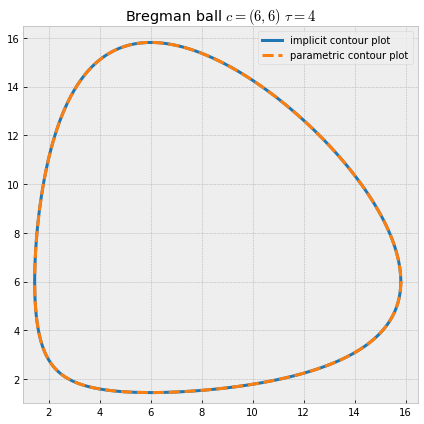

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import scipy.special.lambertw as lambertw

# Bregman KL divergence
def kl(a, b):
    return np.sum(a*np.log(a/b)+b-a)

# Parametric Bregman KL ball of center (cx,cy) and radius r
def klball(cx, cy, r, nb=250):
    x = np.zeros(4*nb)
    y = np.zeros(4*nb)
    du=r/(nb-1)
    # top left quadrant: (x1, y2)
    for i in np.arange(0, nb):
        u = r-(i+0.5) * du
        x[i]=-cx*np.real(lambertw(-np.exp(-u/cx-1), k=0))
        y[i]=-cy*np.real(lambertw(-np.exp(-(r-u)/cy-1), k=-1))
    # top right quadrant: (x2, y2)
    for i in np.arange(0, nb):
        u = (i+0.5) * du
        x[nb+i]=-cx*np.real(lambertw(-np.exp(-u/cx-1), k=-1))
        y[nb+i]=-cy*np.real(lambertw(-np.exp(-(r-u)/cy-1), k=-1))
    # bottom right quadrant: (x2, y1)
    for i in np.arange(0, nb):
        u = r-(i+0.5) * du
        x[2*nb+i]=-cx*np.real(lambertw(-np.exp(-u/cx-1), k=-1))
        y[2*nb+i]=-cy*np.real(lambertw(-np.exp(-(r-u)/cy-1), k=0))
    # bottom left quadrant: (x1, y1)
    for i in np.arange(0, nb):
        u = (i+0.5) * du
        x[3*nb+i]=-cx*np.real(lambertw(-np.exp(-u/cx-1), k=0))
        y[3*nb+i]=-cy*np.real(lambertw(-np.exp(-(r-u)/cy-1), k=0))
    
    return x,y

# Bregman ball center and radius
cx=6
cy=6
r=4

# "handmade" contour plot 
delta = 0.025
xrange = np.arange(1.0, 16.5, delta)
yrange = np.arange(1.0, 16.5, delta)
X, Y = np.meshgrid(xrange,yrange)
# F is one side of the equation, G is the other
F = X-cx+cx*np.log(cx/X)
G = r-(Y-cy+cy*np.log(cy/Y))

# parametric contour plot 
x, y = klball(cx, cy, r)

# figure
with plt.style.context("bmh"):
    plt.figure(figsize=(6,6))
    plt.contour(X, Y, (F - G), [0], colors=["tab:blue"], linewidths=[3])
    plt.plot(x, y, ls='--', lw=3, color= "tab:orange", label="parametric contour plot")
    handles, labels = plt.gca().get_legend_handles_labels()
    handles.insert(0, Line2D([0], [0], color='tab:blue', lw=3))
    labels.insert(0, 'implicit contour plot')
    plt.legend(handles, labels)
    plt.title(r'Bregman ball $c=({},{})$ $\tau={}$'.format(cx,cy,r))
    plt.tight_layout()
    plt.savefig("bball.pdf")
    plt.show()